In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


force_data = pd.read_csv("../dataset/GP1_0.6_force.csv")
marker_data = pd.read_csv("../dataset/GP1_0.6_marker.csv")

# Combine force and marker data
combined_data = pd.concat([force_data, marker_data], axis=1)


In [3]:
combined_data.head()

,FP1_x,FP2_x,FP1_y,FP2_y,FP1_z,FP2_z,L_FCC_x,L_FM1_x,L_FM2_x,L_FM5_x,...,R_FM2_y,R_FM5_y,L_FCC_z,L_FM1_z,L_FM2_z,L_FM5_z,R_FCC_z,R_FM1_z,R_FM2_z,R_FM5_z
0,0.0,-9.537293,0.0,30.241894,0.0,777.790222,1.127087,1.332534,1.328893,1.305142,...,0.448289,0.396237,0.090627,0.084655,0.095734,0.067779,0.081946,0.058241,0.063082,0.048901
1,0.0,-8.993257,0.0,30.251348,0.0,777.832886,1.131831,1.337421,1.333921,1.310700,...,0.448250,0.396193,0.090195,0.086384,0.097342,0.069010,0.082106,0.058203,0.063062,0.048842
2,0.0,-8.459884,0.0,30.250864,0.0,777.852966,1.136807,1.342521,1.339171,1.316510,...,0.448206,0.396145,0.089767,0.088228,0.099043,0.070312,0.082279,0.058166,0.063040,0.048781
3,0.0,-7.937055,0.0,30.241360,0.0,777.852539,1.141961,1.347770,1.344579,1.322506,...,0.448160,0.396093,0.089354,0.090171,0.100820,0.071672,0.082464,0.058132,0.063014,0.048717
4,0.0,-7.424666,0.0,30.223719,0.0,777.833374,1.147230,1.353103,1.350078,1.328615,...,0.448109,0.396038,0.088963,0.092198,0.102656,0.073079,0.082663,0.058101,0.062985,0.048651


In [4]:
# Data Cleaning
combined_data.dropna(inplace=True)

# Remove duplicates
combined_data = combined_data.drop_duplicates()

### Define Target and Features
For demonstration, simulate a target variable (step_duration) by generating synthetic values:

In [5]:
# step duration in seconds
np.random.seed(42)
combined_data['step_duration'] = np.random.uniform(0.5, 1.5, size=combined_data.shape[0])

features = combined_data.drop('step_duration', axis=1)
target = combined_data['step_duration']

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [6]:
target

0        0.874540
1        1.450714
2        1.231994
3        1.098658
4        0.656019
           ...   
11995    0.504644
11996    1.373669
11997    0.807325
11998    1.438589
11999    0.816945
Name: step_duration, Length: 12000, dtype: float64

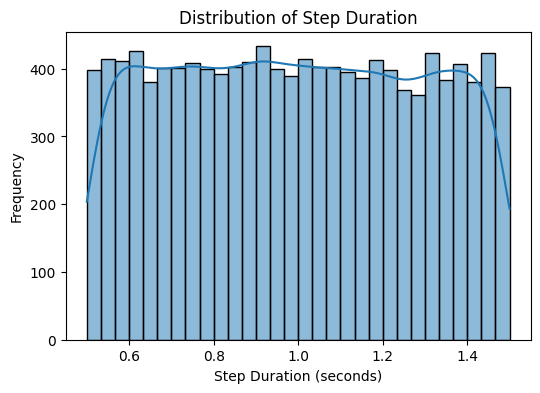

In [7]:
# distribution of the target variable
plt.figure(figsize=(6, 4))
sns.histplot(target, kde=True, bins=30)
plt.title("Distribution of Step Duration")
plt.xlabel("Step Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

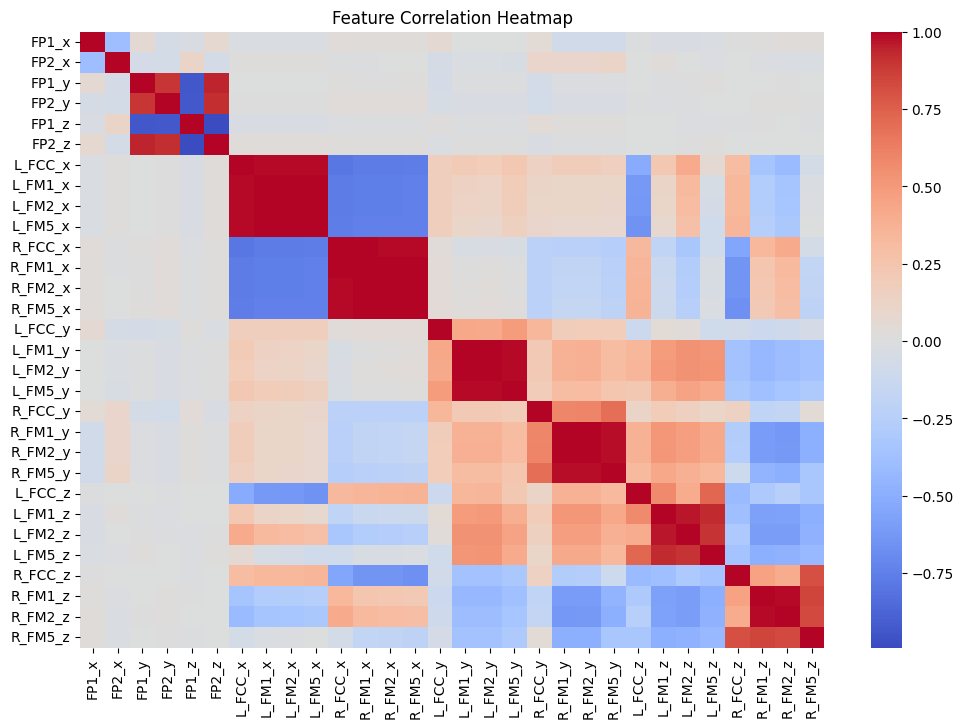

In [8]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = pd.DataFrame(features_scaled, columns=features.columns).corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

In [10]:
# Train model
regressor = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)

regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [11]:
# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.08
R² Score: -0.01


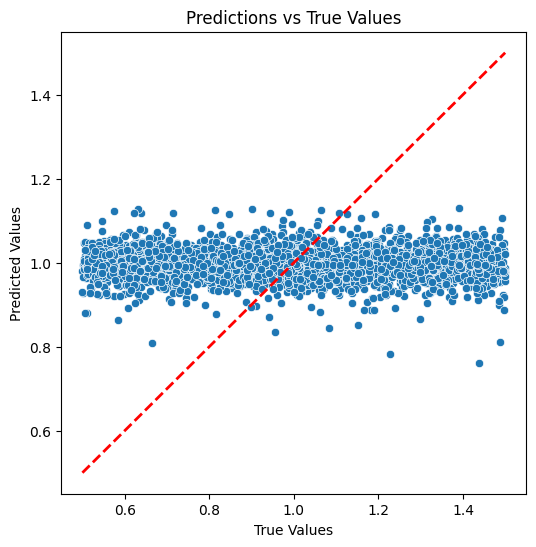

In [12]:
# Visualize predictions vs true values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Predictions vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()